# Marks Sheet Grading Example for AI, ML and DL

In [27]:
import numpy as np
import pandas as pd

In [28]:
df1 = pd.DataFrame(np.random.randint(20,32, size=(5000,5)),
                 columns=['s1','s2','s3','s4','s5'])
df2 = pd.DataFrame(np.random.randint(33,39, size=(5000,5)),
                 columns=['s1','s2','s3','s4','s5'])
df3 = pd.DataFrame(np.random.randint(40,49, size=(5000,5)),
                 columns=['s1','s2','s3','s4','s5'])
df4 = pd.DataFrame(np.random.randint(50,59, size=(5000,5)),
                 columns=['s1','s2','s3','s4','s5'])
df5 = pd.DataFrame(np.random.randint(60,69, size=(5000,5)),
                 columns=['s1','s2','s3','s4','s5'])
df6 = pd.DataFrame(np.random.randint(70,79, size=(5000,5)),
                 columns=['s1','s2','s3','s4','s5'])
df7 = pd.DataFrame(np.random.randint(80,100, size=(5000,5)),
                 columns=['s1','s2','s3','s4','s5'])

df = pd.concat([df1,df2,df3,df4,df5,df6,df7])



df.head()

,s1,s2,s3,s4,s5
0,20,25,22,31,22
1,24,26,23,25,23
2,27,26,21,25,21
3,22,21,21,20,20
4,28,25,31,22,23


In [29]:
df['obtained'] = df.s1 + df.s2 + df.s3 + df.s4 + df.s5
df.head()

,s1,s2,s3,s4,s5,obtained
0,20,25,22,31,22,120
1,24,26,23,25,23,121
2,27,26,21,25,21,120
3,22,21,21,20,20,104
4,28,25,31,22,23,129


In [30]:
df['percentage'] = df.obtained / 500 * 100
df.head()

,s1,s2,s3,s4,s5,obtained,percentage
0,20,25,22,31,22,120,24.0
1,24,26,23,25,23,121,24.2
2,27,26,21,25,21,120,24.0
3,22,21,21,20,20,104,20.8
4,28,25,31,22,23,129,25.8


## Apply Symbolic AI, Classical programming, traditional programming, Rules Based programming
* Rules always define by programmer
* Rules + Input = Output

In [31]:
def grade(x):
    if x >= 80:
        return "A+"
    elif x >= 70:
        return "A"
    elif x >= 60:
        return "B"
    elif x >= 50:
        return "C"
    elif x >= 40:
        return "D"
    elif x >= 33:
        return "E"
    else:
        return "F"
    
df['Grade'] = df.percentage.apply(grade)
df.head()

,s1,s2,s3,s4,s5,obtained,percentage,Grade
0,20,25,22,31,22,120,24.0,F
1,24,26,23,25,23,121,24.2,F
2,27,26,21,25,21,120,24.0,F
3,22,21,21,20,20,104,20.8,F
4,28,25,31,22,23,129,25.8,F


In [32]:
df.Grade.value_counts()

F     5000
B     5000
A+    5000
D     5000
E     5000
C     5000
A     5000
Name: Grade, dtype: int64

<AxesSubplot:>

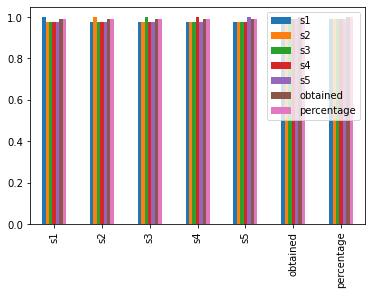

In [33]:
df.corr().plot(kind='bar')

In [34]:
dic = {
    'F':7,
    "E":6,
    "D":5,
    "C":4,
    "B":3,
    "A":2,
    "A+":1
}
df['Grade1'] = df.Grade.map(dic)
df.head()

,s1,s2,s3,s4,s5,obtained,percentage,Grade,Grade1
0,20,25,22,31,22,120,24.0,F,7
1,24,26,23,25,23,121,24.2,F,7
2,27,26,21,25,21,120,24.0,F,7
3,22,21,21,20,20,104,20.8,F,7
4,28,25,31,22,23,129,25.8,F,7


<AxesSubplot:>

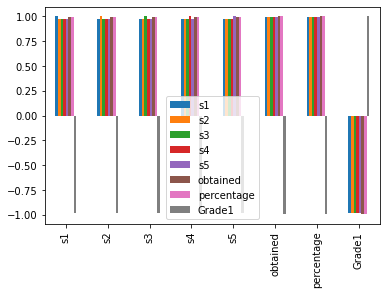

In [35]:
df.corr().plot(kind='bar')

## Find Grades(Rules) with Deep Learning
* input + Output = Rules

In [36]:
df1 = df[['s1', 's2', 's3', 's4', 's5', 'Grade']]
df1.head(2)
df1 = df1.sample(frac=1)
df1

,s1,s2,s3,s4,s5,Grade
394,35,34,35,34,33,E
4184,56,54,51,56,58,C
138,41,43,42,44,43,D
4913,28,25,28,22,25,F
2247,37,34,34,35,38,E
...,...,...,...,...,...,...
191,95,83,95,97,81,A+
67,36,35,38,35,34,E
1751,64,65,62,61,67,B
4030,54,56,56,53,50,C


In [37]:
X = df1.loc[:, 's1':'s5']
X.head()

,s1,s2,s3,s4,s5
394,35,34,35,34,33
4184,56,54,51,56,58
138,41,43,42,44,43
4913,28,25,28,22,25
2247,37,34,34,35,38


In [38]:
Y = df1[['Grade']]
Y.head()

,Grade
394,E
4184,C
138,D
4913,F
2247,E


## Vectorization to Y
* one-hot-encoding

In [39]:
Y = df1['Grade']
Y = pd.get_dummies(Y)
Y.head()

,A,A+,B,C,D,E,F
394,0,0,0,0,0,1,0
4184,0,0,0,1,0,0,0
138,0,0,0,0,1,0,0
4913,0,0,0,0,0,0,1
2247,0,0,0,0,0,1,0


In [40]:
Y.drop_duplicates()

,A,A+,B,C,D,E,F
394,0,0,0,0,0,1,0
4184,0,0,0,1,0,0,0
138,0,0,0,0,1,0,0
4913,0,0,0,0,0,0,1
552,0,1,0,0,0,0,0
4346,0,0,1,0,0,0,0
4647,1,0,0,0,0,0,0


<img src = 'https://i0.wp.com/semiengineering.com/wp-content/uploads/2018/01/MLvsDL.png?ssl=1'>

Import some fundamental libraries

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD

Create your model network structure

* first-layer (input_shape = X.no_of_columns)
* last-layers (output=Y.unique_labels(unique classes))
  * activation = according to your problems (4.6)
* Dense(output)

### Model Structure

In [42]:
model = Sequential()
model.add(Dense(32, activation = 'relu', input_shape = (5,)))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(7, activation = 'softmax')) # output layers = output equal number unique classes
                                            # last layer->activation function= directly connect with your problem 

In [43]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                192       
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 7)                 119       
                                                                 
Total params: 839
Trainable params: 839
Non-trainable params: 0
_________________________________________________________________


### Set compilation process

In [44]:
# Select loss function based on your problems

model.compile(optimizer=SGD(lr=0.002),
             loss='categorical_crossentropy',
             metrics=['acc'])

### Now Start Training

In [49]:
model.fit(X, Y, epochs=100)

Epoch 1/100
1094/1094 [==============================] - 2s 2ms/step - loss: 0.9900 - acc: 0.5949
Epoch 2/100
1094/1094 [==============================] - 2s 2ms/step - loss: 0.9779 - acc: 0.5984
Epoch 3/100
1094/1094 [==============================] - 2s 2ms/step - loss: 1.0043 - acc: 0.5912
Epoch 4/100
1094/1094 [==============================] - 2s 2ms/step - loss: 0.9760 - acc: 0.5881
Epoch 5/100
1094/1094 [==============================] - 2s 2ms/step - loss: 0.9748 - acc: 0.5871
Epoch 6/100
1094/1094 [==============================] - 2s 2ms/step - loss: 0.9971 - acc: 0.5719
Epoch 7/100
1094/1094 [==============================] - 3s 3ms/step - loss: 1.0423 - acc: 0.5708
Epoch 8/100
1094/1094 [==============================] - 2s 2ms/step - loss: 0.9928 - acc: 0.5893
Epoch 9/100
1094/1094 [==============================] - 2s 2ms/step - loss: 0.9772 - acc: 0.5945
Epoch 10/100
1094/1094 [==============================] - 2s 2ms/step - loss: 0.9817 - acc: 0.5847
Epoch 11/100
1094/1

1094/1094 [==============================] - 2s 2ms/step - loss: 0.9318 - acc: 0.6363
Epoch 84/100
1094/1094 [==============================] - 2s 2ms/step - loss: 0.9085 - acc: 0.6376
Epoch 85/100
1094/1094 [==============================] - 2s 2ms/step - loss: 0.9426 - acc: 0.6177
Epoch 86/100
1094/1094 [==============================] - 2s 2ms/step - loss: 0.9300 - acc: 0.6284
Epoch 87/100
1094/1094 [==============================] - 2s 2ms/step - loss: 0.9231 - acc: 0.6286
Epoch 88/100
1094/1094 [==============================] - 2s 2ms/step - loss: 0.9489 - acc: 0.6182
Epoch 89/100
1094/1094 [==============================] - 2s 2ms/step - loss: 0.9315 - acc: 0.6300
Epoch 90/100
1094/1094 [==============================] - 2s 2ms/step - loss: 0.8993 - acc: 0.6524
Epoch 91/100
1094/1094 [==============================] - 2s 2ms/step - loss: 0.9074 - acc: 0.6672
Epoch 92/100
1094/1094 [==============================] - 2s 2ms/step - loss: 0.9576 - acc: 0.6243
Epoch 93/100
1094/1094 

### Genrate Testing Data

In [52]:
df1 = pd.DataFrame(np.random.randint(20, 100, size = (20, 5)),
                  columns = ['s1', 's2', 's3', 's4', 's5'])
df1.head()

,s1,s2,s3,s4,s5
0,72,58,98,23,55
1,56,43,52,33,74
2,82,29,98,59,50
3,41,42,82,99,76
4,68,59,33,86,74


### Now understand how prediction function will work

In [53]:
model.predict([[90,98,95,97,95]])

1/1 [==============================] - 0s 113ms/step


array([[8.1973420e-03, 9.9057490e-01, 1.2271816e-03, 5.9355665e-07,
        2.0350552e-13, 1.5999898e-27, 0.0000000e+00]], dtype=float32)

In [54]:
model.predict([[90,98,95,97,95]]).sum()

1/1 [==============================] - 0s 51ms/step


1.0

In [55]:
model.predict([[90,98,95,97,95]]).max()

1/1 [==============================] - 0s 76ms/step


0.9905749

In [56]:
print(model.predict([[90,98,95,97,95]]))
np.argmax(model.predict([[90,98,95,97,95]]))

1/1 [==============================] - 0s 55ms/step
[[8.1973420e-03 9.9057490e-01 1.2271816e-03 5.9355665e-07 2.0350552e-13
  1.5999898e-27 0.0000000e+00]]
1/1 [==============================] - 0s 45ms/step


1

In [57]:
Y.columns

Index(['A', 'A+', 'B', 'C', 'D', 'E', 'F'], dtype='object')

In [58]:
# pass single row for prediction
Y.columns.take(np.argmax(model.predict([[90,98,95,97,95]]), axis=1))

1/1 [==============================] - 0s 55ms/step


Index(['A+'], dtype='object')

In [59]:
df1['predict']=Y.columns.take(np.argmax(model.predict(df1.loc[:,'s1':'s5']), axis=1))
df1

1/1 [==============================] - 0s 30ms/step


,s1,s2,s3,s4,s5,predict
0,72,58,98,23,55,A+
1,56,43,52,33,74,A+
2,82,29,98,59,50,B
3,41,42,82,99,76,B
4,68,59,33,86,74,B
5,35,62,70,65,56,C
6,35,99,36,96,58,B
7,84,75,98,99,56,A+
8,20,80,22,22,70,F
9,74,60,34,76,50,B


# Find Grades(Rules) With Machine Learning

### Load libraries

In [60]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

### Split dataset in features and target variable

In [81]:
X = df['percentage'] # Features
Y = df['Grade'] # Target variable

In [82]:
X.head()

0    24.0
1    24.2
2    24.0
3    20.8
4    25.8
Name: percentage, dtype: float64

In [83]:
Y.head()

0    F
1    F
2    F
3    F
4    F
Name: Grade, dtype: object

### Converting Pandas series into 2D array

In [84]:
X = np.array(X).reshape(-1,1)
Y = np.array(Y).reshape(-1,1)

### Split dataset into training set and test set

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1) # 70% training and 30% testing data

### Create Decision Tree classifier object

In [86]:
clf = DecisionTreeClassifier()

### Train Decision Tree Classifier

In [87]:
clf_model = clf.fit(X_train, y_train)

### Predict the response for test dataset

In [88]:
y_pred = clf.predict(X_test)

### Model Accuracy, how often is the classifier correct?

In [89]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)) 

Accuracy: 1.0


Comment: Accuracy of our model is 100%

In [90]:
from sklearn import tree
import matplotlib.pyplot as plt

[Text(651.0, 996.6, 'X[0] <= 79.6\ngini = 0.857\nsamples = 24500\nvalue = [3520, 3543, 3516, 3469, 3505, 3494, 3453]\nclass = y[1]'),
 Text(558.0, 815.4000000000001, 'X[0] <= 69.3\ngini = 0.833\nsamples = 20957\nvalue = [3520, 0, 3516, 3469, 3505, 3494, 3453]\nclass = y[0]'),
 Text(465.0, 634.2, 'X[0] <= 59.0\ngini = 0.8\nsamples = 17437\nvalue = [0, 0, 3516, 3469, 3505, 3494, 3453]\nclass = y[2]'),
 Text(372.0, 453.0, 'X[0] <= 39.2\ngini = 0.75\nsamples = 13921\nvalue = [0, 0, 0, 3469, 3505, 3494, 3453]\nclass = y[4]'),
 Text(186.0, 271.79999999999995, 'X[0] <= 31.7\ngini = 0.5\nsamples = 6947\nvalue = [0, 0, 0, 0, 0, 3494, 3453]\nclass = y[5]'),
 Text(93.0, 90.59999999999991, 'gini = 0.0\nsamples = 3453\nvalue = [0, 0, 0, 0, 0, 0, 3453]\nclass = y[6]'),
 Text(279.0, 90.59999999999991, 'gini = 0.0\nsamples = 3494\nvalue = [0, 0, 0, 0, 0, 3494, 0]\nclass = y[5]'),
 Text(558.0, 271.79999999999995, 'X[0] <= 49.0\ngini = 0.5\nsamples = 6974\nvalue = [0, 0, 0, 3469, 3505, 0, 0]\nclass = y[

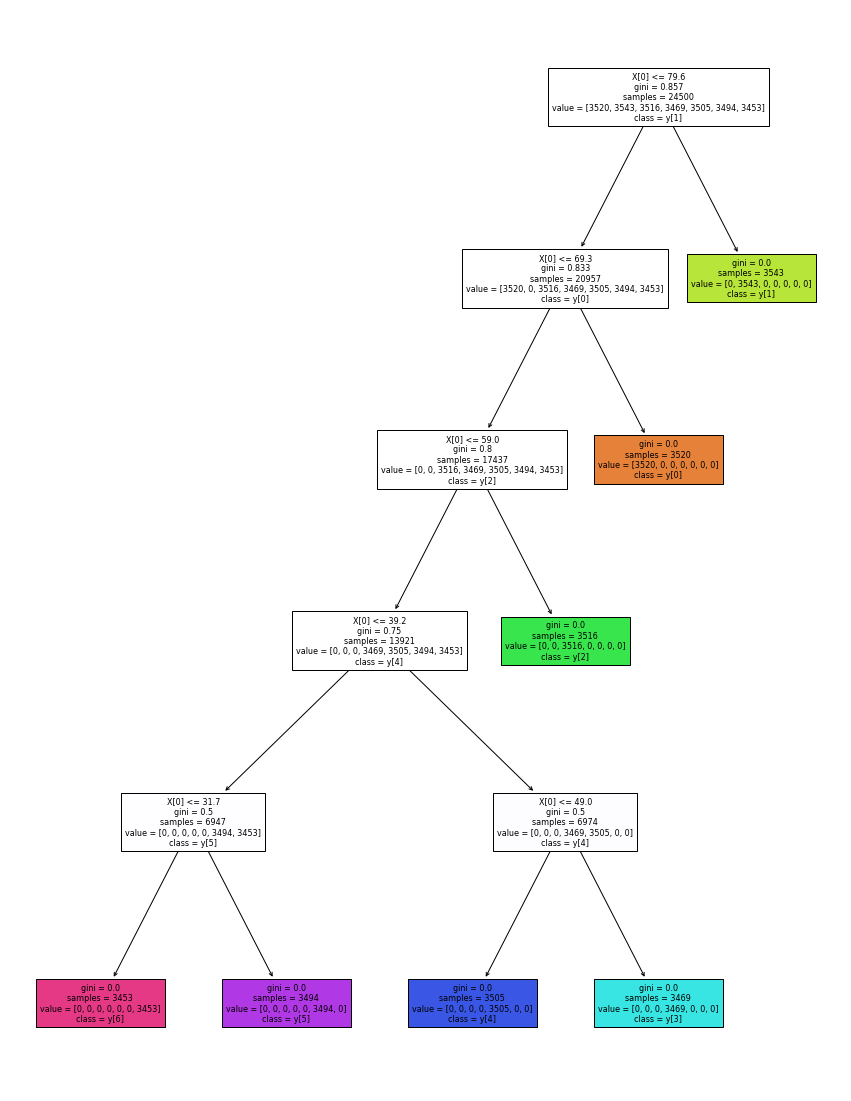

In [93]:
plt.figure(figsize=(15, 20))
tree.plot_tree(clf, filled = tree, class_names = True, fontsize = 8)